# Data Cleaning in Python — A Hands-On Tutorial and Exercise prepared by Dr. Pamela Thompson

**Course:** Intro to Data Mining  
**Your Name:** Add your name
**Dataset:** Titanic Passengers (loaded from a public URL, no file downloads needed!)  

---

## Why does data cleaning matter?

Real-world data is *messy*. Before we can build any model or draw any conclusions, we need to:

1. **Understand** the data (shape, types, distributions)
2. **Find problems** (missing values, duplicates, outliers, wrong types)
3. **Fix them** using appropriate strategies

In practice, data scientists spend **60–80 %** of their time on data cleaning and preparation. This notebook walks through the most common cleaning steps using the famous Titanic dataset.

> **Tip:** Run each cell one at a time and read the output before moving on. The goal is to understand *why* we do each step, not just *how*.

---
## 1. Load the Data & Take a First Look

We always start by loading the data and getting a quick overview. The key questions are:
- How many rows and columns?
- What do the first few rows look like?
- What are the column data types?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'
df = pd.read_csv(url)

print(f'Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns')
df.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.


In [27]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [28]:
# Identify categorical columns (dtype == 'object' means text/string)
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

# Identify numerical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_cols)
print('Numerical columns: ', num_cols)

Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [29]:
# For categorical columns, check how many unique values each has
# This helps us decide which ones are useful for analysis
df[cat_cols].nunique()

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


---
## 3. Descriptive Statistics

`.describe()` gives us summary statistics for numerical columns. Look for:
- Big differences between **mean** and **median (50%)** indicates possible skew or outliers
- **min/max** values that seem unreasonable
- The **count** row (does it match the total number of rows?)

In [30]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


---
### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [31]:
# .duplicated() returns True for each row that is a duplicate of an earlier row
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [60]:
zero_pct = ((df==0).sum())/len(df)
zero_pct = zero_pct.round(2)
print('Percentage of zeros per column:')
print(zero_pct[zero_pct > 0])

Percentage of zeros per column:
Sex                  0.79
Cholesterol          0.19
FastingBS            0.77
ExerciseAngina       0.60
Oldpeak              0.40
ST_Slope             0.50
HeartDisease         0.45
ChestPainType_ATA    0.81
ChestPainType_NAP    0.78
ChestPainType_TA     0.95
dtype: float64


In [32]:
# Calculate the percentage of missing values for each column
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct.round(2)

print('Percentage of missing values per column:')
print(missing_pct[missing_pct > 0])  # Only show columns with missing values

Percentage of missing values per column:
Series([], dtype: float64)


In [47]:
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean())

---
## 6. Encode Categorical Variables

Remember those `object` columns from Section 2? After dropping `Name`, `Ticket`, and `Cabin`, we still have two text columns left: **`Sex`** and **`Embarked`**. Machine learning algorithms need numbers, so we need to convert these text values into numerical form.

There are two common encoding methods:

| Method | How it works | Best for |
|--------|-------------|----------|
| **Label Encoding** | Assigns a number to each category (e.g., male=0, female=1) | Columns with only 2 categories, or categories with a natural order |
| **One-Hot Encoding** | Creates a new column for each category with 0/1 values | Columns with 3+ categories that have no natural order |

> **Why not just use label encoding for everything?** If we encode Embarked as C=0, Q=1, S=2, the model might think S > Q > C (i.e., that there's an order). One-hot encoding avoids this problem.

### 6a: Label Encoding for `Sex` (2 categories)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [49]:
# Sex has only 2 categories, so label encoding works well
print('Before encoding:')
print(df['Sex'].value_counts())

# Map text to numbers
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

print('\nAfter encoding:')
print(df['Sex'].value_counts())

Before encoding:
Sex
M    725
F    193
Name: count, dtype: int64

After encoding:
Sex
0    725
1    193
Name: count, dtype: int64


In [50]:
# Sex has only 2 categories, so label encoding works well
print('Before encoding:')
print(df['ExerciseAngina'].value_counts())

# Map text to numbers
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

print('\nAfter encoding:')
print(df['ExerciseAngina'].value_counts())

Before encoding:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

After encoding:
ExerciseAngina
0    547
1    371
Name: count, dtype: int64


In [51]:
# Sex has only 2 categories, so label encoding works well
print('Before encoding:')
print(df['ST_Slope'].value_counts())

# Map text to numbers
df['ST_Slope'] = df['ST_Slope'].map({'Flat': 0, 'Up': 1})

print('\nAfter encoding:')
print(df['ST_Slope'].value_counts())

Before encoding:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

After encoding:
ST_Slope
0.0    460
1.0    395
Name: count, dtype: int64


### 6b: One-Hot Encoding for `Embarked` (3 categories)

In [52]:
# Embarked has 3 categories (C, Q, S) with no natural order → use one-hot encoding
print('Before encoding:')
print(df['ChestPainType'].value_counts())

# pd.get_dummies() creates one new column per category
# drop_first=True removes one column to avoid redundancy
#   (if it's NOT Embarked_Q and NOT Embarked_S, it must be C)
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)

print('\nAfter encoding — new columns added:')
df.head()

Before encoding:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

After encoding — new columns added:


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,Normal,172,0,0.0,1.0,0,True,False,False
1,49,1,160,180,0,Normal,156,0,1.0,0.0,1,False,True,False
2,37,0,130,283,0,ST,98,0,0.0,1.0,0,True,False,False
3,48,1,138,214,0,Normal,108,1,1.5,0.0,1,False,False,False
4,54,0,150,195,0,Normal,122,0,0.0,1.0,0,False,True,False


In [53]:
# Check: no more 'object' columns!
print('Data types after encoding:')
print(df.dtypes)
print(f'\nAll columns are now numerical: {all(df.dtypes != "object")}')

Data types after encoding:
Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
RestingECG            object
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
ST_Slope             float64
HeartDisease           int64
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
dtype: object

All columns are now numerical: False


Now every column is numerical and ready for machine learning algorithms.

---
## 7. Detect and Handle Outliers

Outliers are extreme values that are far from the rest of the data. They can distort statistics and model training.

We'll use two common detection methods:
1. **Visual inspection** with box plots
2. **IQR (Interquartile Range) method** — a standard statistical approach

### 7a: Visualize with Box Plots

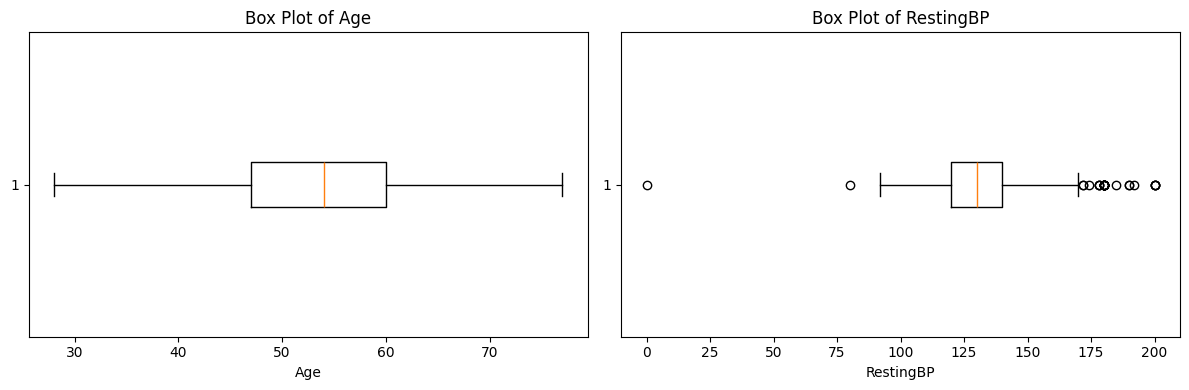

In [54]:
# Box plots for Age and Fare
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(df_clean['Age'], vert=False)
axes[0].set_xlabel('Age')
axes[0].set_title('Box Plot of Age')

axes[1].boxplot(df_clean['RestingBP'], vert=False)
axes[1].set_xlabel('RestingBP')
axes[1].set_title('Box Plot of RestingBP')

plt.tight_layout()
plt.show()

### 7b: IQR Method for Outlier Detection

The IQR method defines outliers as values that fall below `Q1 - 1.5 × IQR` or above `Q3 + 1.5 × IQR`.

- **Q1** = 25th percentile
- **Q3** = 75th percentile
- **IQR** = Q3 − Q1

In [56]:
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method. Returns a boolean mask."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    print(f'{column}:')
    print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
    return outliers

age_outliers = detect_outliers_iqr(df, 'Age')
print()
fare_outliers = detect_outliers_iqr(df, 'RestingBP')

Age:
  Q1 = 47.00, Q3 = 60.00, IQR = 13.00
  Lower bound = 27.50, Upper bound = 79.50
  Number of outliers: 0 (0.0%)

RestingBP:
  Q1 = 120.00, Q3 = 140.00, IQR = 20.00
  Lower bound = 90.00, Upper bound = 170.00
  Number of outliers: 28 (3.1%)


In [57]:
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method. Returns a boolean mask."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    print(f'{column}:')
    print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
    return outliers

age_outliers = detect_outliers_iqr(df, 'Cholesterol')
print()
fare_outliers = detect_outliers_iqr(df, 'MaxHR')

Cholesterol:
  Q1 = 173.25, Q3 = 267.00, IQR = 93.75
  Lower bound = 32.62, Upper bound = 407.62
  Number of outliers: 183 (19.9%)

MaxHR:
  Q1 = 120.00, Q3 = 156.00, IQR = 36.00
  Lower bound = 66.00, Upper bound = 210.00
  Number of outliers: 2 (0.2%)


---
## 8. Feature Scaling (Normalization)

Many machine learning algorithms work better when numerical features are on the **same scale**.

| Method | Formula | Range | When to use |
|--------|---------|-------|-------------|
| **Min-Max Scaling** | (x - min) / (max - min) | [0, 1] | When you want bounded values |
| **Standardization** | (x - mean) / std | ~[-3, 3] | When data is roughly normal |

We'll demonstrate Min-Max scaling here.

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Get the numerical columns to scale
# We exclude 'Survived' (target) and the one-hot columns (already 0/1)
num_cols_to_scale = ['Cholesterol', 'Age', 'MaxHR', 'RestingBP']

# Make a copy so we don't modify our cleaned data
df_scaled = df.copy()

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_scaled[num_cols_to_scale] = scaler.fit_transform(df_scaled[num_cols_to_scale])

print('Scaled data (first 5 rows):')
df_scaled.head()

Scaled data (first 5 rows):


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.244898,0,0.70,0.479270,0,Normal,0.788732,0,0.0,1.0,0,True,False,False
1,0.428571,1,0.80,0.298507,0,Normal,0.676056,0,1.0,0.0,1,False,True,False
2,0.183673,0,0.65,0.469320,0,ST,0.267606,0,0.0,1.0,0,True,False,False
3,0.408163,1,0.69,0.354892,0,Normal,0.338028,1,1.5,0.0,1,False,False,False
4,0.530612,0,0.75,0.323383,0,Normal,0.436620,0,0.0,1.0,0,False,True,False


In [59]:
# Verify: all scaled columns should now be between 0 and 1
df_scaled[num_cols_to_scale].describe().round(2)

,Cholesterol,Age,MaxHR,RestingBP
count,918.00,918.00,918.00,918.00
mean,0.33,0.52,0.54,0.66
std,0.18,0.19,0.18,0.09
min,0.00,0.00,0.00,0.00
25%,0.29,0.39,0.42,0.60
50%,0.37,0.53,0.55,0.65
75%,0.44,0.65,0.68,0.70
max,1.00,1.00,1.00,1.00


1. There were no missing values and less outliers in the Heart Disease dataset which made the data easier to work with but some of the categories such as FastingBP were a bit harder to interpret. Also the outliers from this dataset made sense medically therefore I did not remove them. Overall the Heart Disease dataset was better quality. <br>
2. To handle missing values I imputed the mean for Cholesterol. Although there were technically no missing values, it did not make sense for the cholesterol to be 0.I assumed it was an error and used the mean to replace these 0's because it was a too much valuable data to drop and because it roughly distributed normally. <br>
3. There were alot of outliers in Cholesterol, and some outliers in RestingBP and MaxHR but I chose not to remove them. I didn't remove them because these outliers could be useful when analyzing Heart Disease since medically these variables are connected. It could be useful to include these outliers if we were making a prediction about someones chances of having Heart Disease. <br>
4. If I were building a predictive model columns ChestPainType, RestingBP, Cholesterol,and Age would be the most important. These things seem like they would be the first things checked when diagnosing Heart Disease so I would base my model on the same factors.